### <font color='red'>Nota: 10</font>

# Machine Learning para Economistas

## Trabajo Práctico 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 16 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP2
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [2]:
#Primero que nada, instalamos las librerías para realizar los ejercicios. 
!pip install requests 
!pip install BeautifulSoup 
!pip install pandas

import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe manipulator

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/_t/mb603w6j5pnb26rgk4q_j3_m0000gn/T/pip-install-7__indsj/beautifulsoup_caba0823d31b47f09d2894c1d8d46a58/setup.py", line 3
          "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                         ^^
      SyntaxError: invalid syntax
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating

In [3]:
# Para este ejercicio puntual, utilizaremos una API para consultar por "perfumes de mujer" a Mercado Libre. 
# Por empezar, sabemos que tenemos que seguir este formato:
# https://api.mercadolibre.com/sites/$SITE_ID/search?q=nombre%20item

# Donde:
# $SITE_ID: MLA (Mercado Libre) 
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "perfume de mujer"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

In [6]:
# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

<Response [200]>


In [10]:
#aquí guardamos toda la data en un diccionario para poder manipularla. 
data = response.json()

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [12]:
# Los productos estan en la key 'results'.
# Primero vemos cuantos productos tenemos:
print("Hay data de", len(data["results"]), "productos") 

#Genero una lista con la data de todos los productos
productos = data['results'] # es una lista donde cada elemento es un diccionario que contiene la info de un producto.
# cada diccionario tiene 33 elementos donde se detalla si acepta MP, la condicion del producto, el precio, el link, el titulo, etc. 

# Genero un diccionario vacio donde lo ire rellenando agregando el nombre, el link del producto y el precios:
data_productos = {} 

# Loop para rellenar el diccionario con nombre del producto, link y precio:
for i, producto in enumerate(productos): # i es indice de cada producto en la lista y producto es un diccionario con la data de cada producto
    #relleno el diccionario que tiene el nombre, el link del producto y el precio de todos los productos
    data_productos[i] = {
        'titulo': producto['title'],
        'precio': producto['price'],
        'link': producto['permalink']
    } 

# Paso el diccionario a dataframe:
import pandas as pd 
df_productos = pd.DataFrame.from_dict(data_productos, orient='index') 

# Calculo el precio promedio, el precio minimo y el precio maximo:
precio_promedio = df_productos['precio'].mean()
precio_minimo = df_productos['precio'].min()
precio_maximo = df_productos['precio'].max() 

# Mostramos los resultados:
print("El precio promedio es $", round(precio_promedio))
print("El precio mínimo es $", round(precio_minimo))
print("El precio máximo es $", round(precio_maximo))

Hay data de 48 productos
El precio promedio es $ 45384
El precio mínimo es $ 6052
El precio máximo es $ 212000


#### Ejercicio 3
Armen un histograma de los precios usando Matplotlib. ¿Ven algún <i>outlier<i>? 

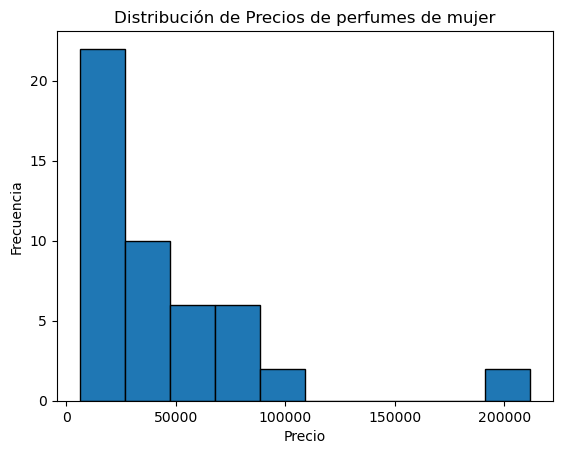

                                               titulo    precio  \
25  Giorgio Armani My Way Edp 90 ml Para  Mujer Re...  212000.0   
8      Lancôme La Vie Est Belle Edp 75 ml Para  Mujer  192685.0   
15  Perfume Cacharel Anais Anais Eau De Toilette 1...   99054.0   

                                                 link  
25  https://www.mercadolibre.com.ar/giorgio-armani...  
8   https://www.mercadolibre.com.ar/lancme-la-vie-...  
15  https://www.mercadolibre.com.ar/perfume-cachar...  


In [16]:
# Importo libreria:
import matplotlib.pyplot as plt

# Creo histograma:
plt.hist(df_productos['precio'], bins=10, edgecolor='black')

#Titulo y ejes:
plt.title('Distribución de Precios de perfumes de mujer')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

#Mostramos el histograma
plt.show()

# Identifiquemos a los outliers, las observaciones que estan en la cola derecha de la distribucion (los perfumes mas caros)
# Ordenemos el dataframe por orden descentente de precios:
df_ordenado = df_productos.sort_values(by='precio', ascending=False) 
print(df_ordenado.head(3))

# Los perfumes mas caros (outliers) pertenecen a marcas como Paco Rabanne, Lancôme La Vie y Giorgio Armani


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [18]:
#Para este ejercicio, vamos a analizar las ventas por el seller ID

# Definir el `seller_id` de un vendedor al azar que agarramos de los resultados obtenidos anteriormente
seller_id = "261745655"  # Reemplaza por el `seller_id` correcto

# Construir la URL 
url = "https://api.mercadolibre.com/sites/{}/search?seller_id={}".format("MLA", seller_id)

# Realizar la solicitud a la API de Mercado Libre
response = requests.get(url)
data = response.json()

# En segundo lugar, creamos listas vacías para almacenar datos de interés
productos = []
precios = []
mercado_pago_aceptado = []

# Iterar sobre los resultados y extraer el nombre, precio, y si acepta Mercado Pago
for item in data['results']:
    productos.append(item['title'])
    precios.append(item['price'])
    mercado_pago_aceptado.append(item['accepts_mercadopago'])

# Crear un DataFrame con la información
df = pd.DataFrame({
    'Producto': productos,
    'Precio': precios,
    'Acepta Mercado Pago': mercado_pago_aceptado,
})

print(df.head())

#Lo interesante de realizar este ejercicio, es que podemos ver el detalle de todos los productos que vende un seller determinado, 
#y analizar todas las variables relevantes. En este caso, este seller vende 5 productos, y en todos los casos acepta mercado pago. 

                                            Producto   Precio  \
0  Sérum L'oréal Paris Revitalift Ácido Hialuróni...  22540.0   
1  Ácido Hialurónico Sérum De Ojos L'oréal Paris ...  17955.0   
2  Gel Crema L´oréal Paris Revitalift Ácido Hialu...  16730.0   
3  Corrector De Ojeras Maybelline Instant Age Rew...  13519.8   
4  Banderas King Of Seduction Absolute 100ml Para...  38850.0   

   Acepta Mercado Pago  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
url = "https://www.lanacion.com.ar/"

r = requests.get(url)  # Traemos el contenido del HTML
contenido = r.content
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
# Dentro de la sopa, buscamos todos los elementos <a>
a_elements = soup.find_all('a', class_='link ln-link flex flex-column --unstyled')

# Creamos una lista para guardar los links
links = []

# Extraemos los links (atributo href) y los guardamos
for a_element in a_elements:
    href = a_element.get('href')  # Extraemos el atributo href
    if href:  # Verificamos si href no es None
        # Concatenamos el dominio si es necesario
        if not href.startswith('http'):
            href = "https://www.lanacion.com.ar" + href
        
        links.append({
            'Link': href  # Guardamos el link
        })

# Creamos un dataframe a partir de la lista de links
links_df = pd.DataFrame(links)

In [ ]:
links_df

In [ ]:
# Exportamos el dataframe a un archivo Excel
links_df.to_excel("links_lanacion.xlsx", index=False)